## Import library

In [75]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


#sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import xgboost as xgb


from sklearn import preprocessing, decomposition, metrics, pipeline




#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# preprocessing
import re
import string
import contractions
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from wordcloud import WordCloud


import os
import warnings
warnings.filterwarnings('ignore')


## Data Import

In [50]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//chatgpt//chatgpt_reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


## Data cleaning

In [3]:
df.shape

(10000, 12)

In [51]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [52]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [9]:
df.describe(include="all")

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
count,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000
unique,366,10,10000,NaN,9460,NaN,NaN,2,5,6,NaN,2
top,2025-01-10 00:00:00,Buggy,Mother former community upon vote fact. Sure s...,NaN,owilliams,NaN,NaN,Mobile,en,Canada,NaN,No
freq,44,1037,1,NaN,6,NaN,NaN,5011,2016,1711,NaN,5116
first,2024-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.987000,NaN,50.347800,147.034000,NaN,NaN,NaN,3.651070,NaN
std,NaN,NaN,NaN,1.424161,NaN,28.914613,34.911708,NaN,NaN,NaN,0.438935,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,30.000000,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,25.000000,122.000000,NaN,NaN,NaN,3.500000,NaN


In [10]:
assert pd.notnull(df).all().all()

In [11]:
df["rating"].value_counts()

1    2062
5    2013
2    2007
4    1975
3    1943
Name: rating, dtype: int64

In [12]:
df["platform"].value_counts()

Mobile    5011
Web       4989
Name: platform, dtype: int64

In [13]:
df["language"].value_counts()

en    2016
fr    2013
de    2001
hi    1991
es    1979
Name: language, dtype: int64

In [14]:
df["location"].value_counts()

Canada       1711
UK           1686
Germany      1664
India        1659
USA          1654
Australia    1626
Name: location, dtype: int64

In [15]:
df["version"].value_counts()

4.1    2522
3.0    2496
4.0    2491
3.5    2491
Name: version, dtype: int64

In [16]:
df["verified_purchase"].value_counts()

No     5116
Yes    4884
Name: verified_purchase, dtype: int64

In [17]:
df[["title","review"]]

,title,review
0,Impressive,Mother former community upon vote fact. Sure s...
1,Waste of Time,General paper understand main. Or age half won...
2,Waste of Time,Here situation his high stage. Agree certainly...
3,Not Accurate,Rule court behind growth reality. Tonight whos...
4,Fantastic Experience,Case opportunity season road write. Effort gre...
...,...,...
9995,Very Helpful,Little section hit her through. Likely job ind...
9996,Buggy,Throw with record relationship help reduce vot...
9997,Not Accurate,Within nothing study charge all. Toward milita...
9998,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...


In [19]:
df["title"].nunique()

10

In [18]:
df["title"].value_counts()

Buggy                   1037
Very Helpful            1019
Waste of Time           1018
Too Slow                1016
Superb!                 1012
Great Tool!             1001
Needs Improvement        994
Fantastic Experience     984
Impressive               970
Not Accurate             949
Name: title, dtype: int64

In [20]:
df["review"].head(10)

0    Mother former community upon vote fact. Sure s...
1    General paper understand main. Or age half won...
2    Here situation his high stage. Agree certainly...
3    Rule court behind growth reality. Tonight whos...
4    Case opportunity season road write. Effort gre...
5    Top position able wear its between kid. Number...
6    Brother individual process always. Sing behind...
7    Upon bit pick. Seven along unit local these. C...
8    Number choice student production son understan...
9    Stand space approach southern.\nGlass federal ...
Name: review, dtype: object

## Data preprocessing

In [53]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Convert the txt expand 
    text = contractions.fix(text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove special characters and numbers (if any remain)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Apply to the review column
df['clean_review'] = df['review'].apply(clean_text)

# View the cleaned reviews
df[['review', 'clean_review']].head()

,review,clean_review
0,Mother former community upon vote fact. Sure s...,mother former community upon vote fact sure st...
1,General paper understand main. Or age half won...,general paper understand main age half wonder ...
2,Here situation his high stage. Agree certainly...,situation high stage agree certainly blue thou...
3,Rule court behind growth reality. Tonight whos...,rule court behind growth reality tonight whose...
4,Case opportunity season road write. Effort gre...,case opportunity season road write effort gree...


In [54]:
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Remove numbers and punctuation
    return ' '.join(lemmatized)

# Apply to cleaned text
df['lemmatized_review'] = df['clean_review'].apply(tokenize_and_lemmatize)
df[['clean_review','lemmatized_review']]

,clean_review,lemmatized_review
0,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...
1,general paper understand main age half wonder ...,general paper understand main age half wonder ...
2,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...
3,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...
4,case opportunity season road write effort gree...,case opportunity season road write effort gree...
...,...,...
9995,little section hit likely job indicate detail ...,little section hit likely job indicate detail ...
9996,throw record relationship help reduce voteimpa...,throw record relationship help reduce voteimpa...
9997,within nothing study charge toward military al...,within nothing study charge toward military al...
9998,rule kitchen trouble culturaldeep manage addre...,rule kitchen trouble culturaldeep manage addre...


In [55]:
def analy_senti(text):
    blob = TextBlob(str(text))
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

df[['polarity', 'subjectivity']] = df['lemmatized_review'].apply(analy_senti)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,polarity,subjectivity
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,0.291667,0.546296
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,0.122159,0.333807
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,0.092302,0.574762
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,-0.133333,0.519048
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,0.175000,0.391667


In [56]:
def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,polarity,subjectivity,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,0.291667,0.546296,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,0.122159,0.333807,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,0.092302,0.574762,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,-0.133333,0.519048,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,0.175000,0.391667,Positive


In [59]:
df["sentiment"].value_counts()

Positive    6575
Negative    2353
Neutral     1072
Name: sentiment, dtype: int64

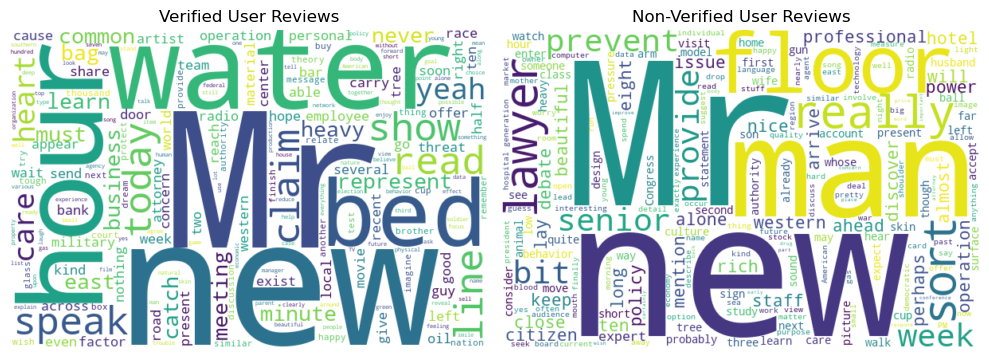

In [22]:
verified_reviews = df[df['verified_purchase'] == 'Yes']['review'].dropna()
non_verified_reviews = df[df['verified_purchase'] == 'No']['review'].dropna()

# Create side-by-side wordclouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# WordCloud for verified reviews
wordcld1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(verified_reviews))
ax1.imshow(wordcld1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title("Verified User Reviews")

# WordCloud for non-verified reviews
wordcld2 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(non_verified_reviews))
ax2.imshow(wordcld2, interpolation='bilinear')
ax2.axis('off')
ax2.set_title("Non-Verified User Reviews")

plt.tight_layout()
plt.show()

<Axes: xlabel='review'>

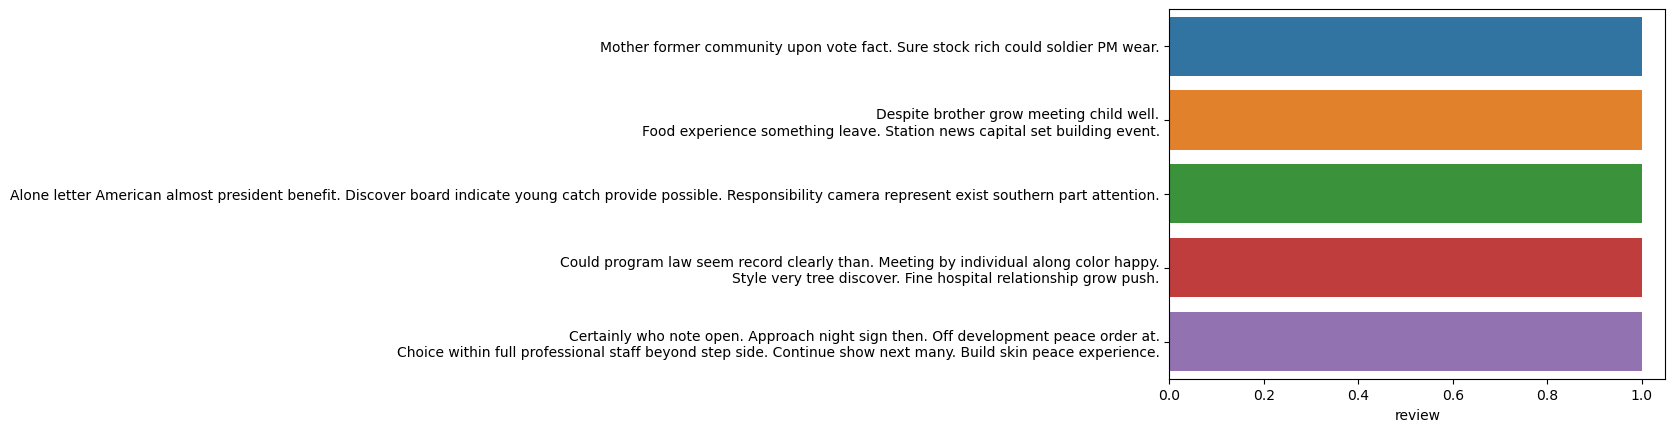

In [123]:
sns.barplot(x = df['review'].value_counts()[:5], y= df['review'].value_counts()[:5].index, orient = 'h')

## EDA

### 1) Rating

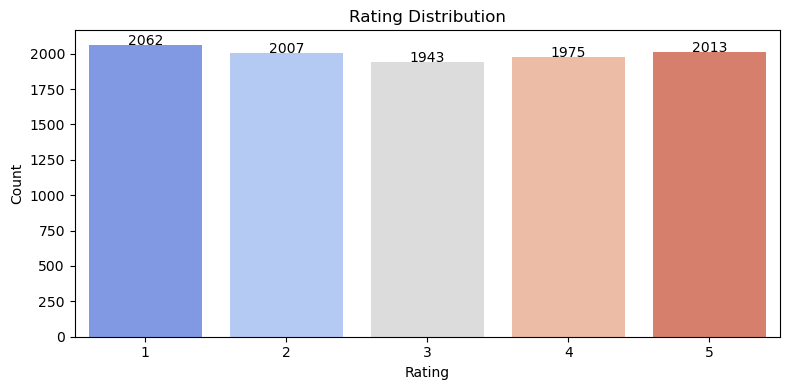

In [45]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

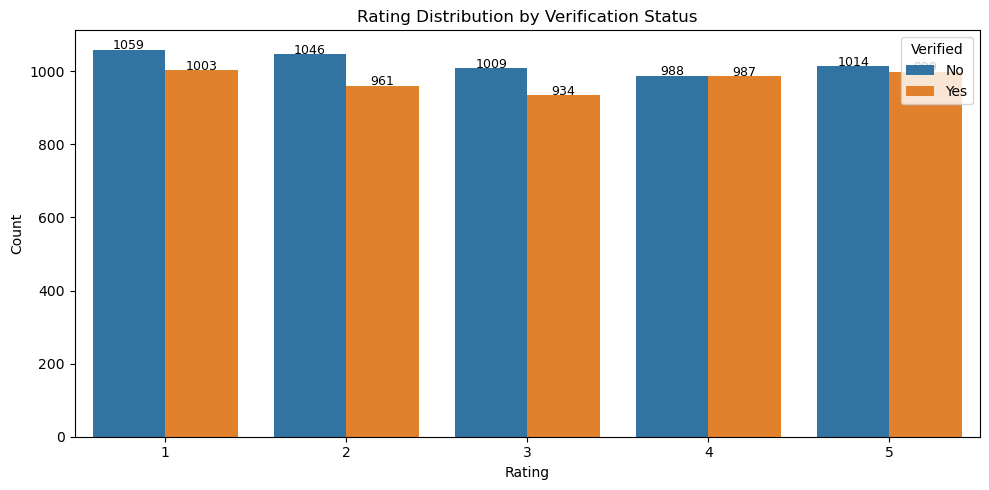

In [59]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', hue='verified_purchase')

plt.title('Rating Distribution by Verification Status')
plt.xlabel('Rating')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=9)

plt.legend(title='Verified')
plt.tight_layout()
plt.show()

### 2) Helpful-votes

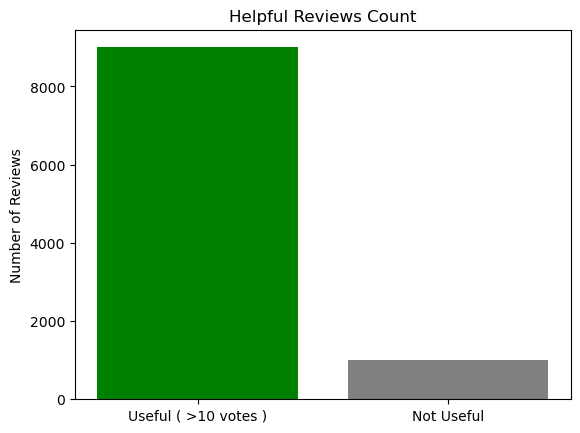

In [58]:
useful_reviews = df[df['helpful_votes'] > 10]
not_useful_reviews = df[df['helpful_votes'] <= 10]

plt.bar(['Useful ( >10 votes )', 'Not Useful'], [len(useful_reviews), len(not_useful_reviews)], color=['green', 'gray'])
plt.title("Helpful Reviews Count")
plt.ylabel("Number of Reviews")

#for i, count in enumerate([len(useful_reviews), len(not_useful_reviews)]):
#    plt.text(i, count + 2, str(count), ha='center', fontsize=12)  # Adjusting vertical position (+2) for readability

#plt.tight_layout()
plt.show()

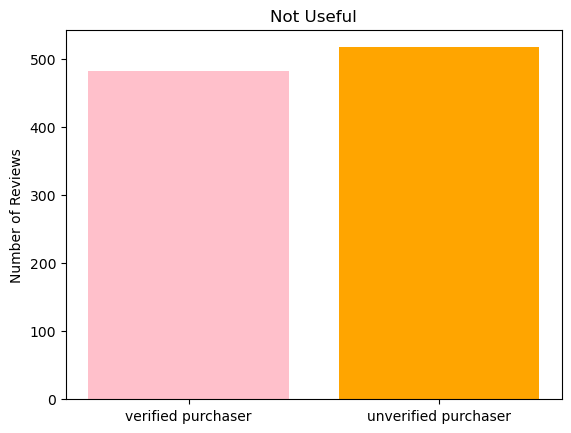

In [30]:
not_useful_reviews_verified_purchaser = df[(df['helpful_votes'] <= 10) & (df["verified_purchase"]=="Yes")]
not_useful_reviews_unverified_purchaser = df[(df['helpful_votes'] <= 10) & (df["verified_purchase"]=="No")]


plt.bar(['verified purchaser',"unverified purchaser"], [len(not_useful_reviews_verified_purchaser), len(not_useful_reviews_unverified_purchaser)], color=["pink", "orange"])
plt.title("Not Useful")
plt.ylabel("Number of Reviews")
plt.show()

### 3) Most Common Keywords in Positive vs. Negative Reviews

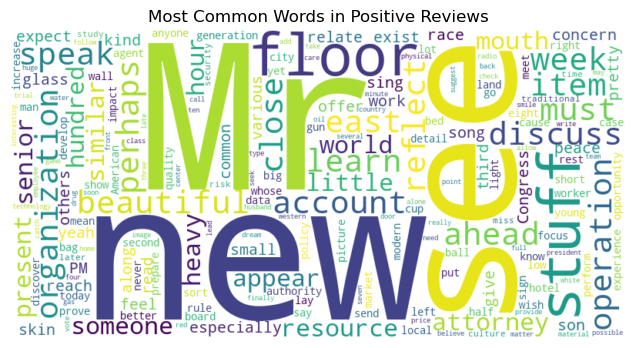

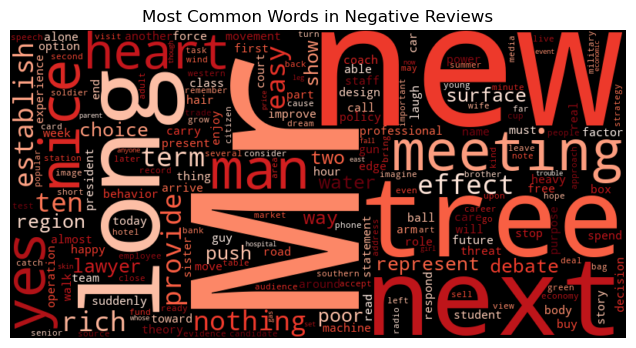

In [25]:
positive_reviews = df[df['rating'] >= 4]['review']
negative_reviews = df[df['rating'] <= 2]['review']


pos_text = " ".join(positive_reviews)
neg_text = " ".join(negative_reviews)


wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")
plt.show()

# Negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews")
plt.show()

### 4) Rating Changed Over Time

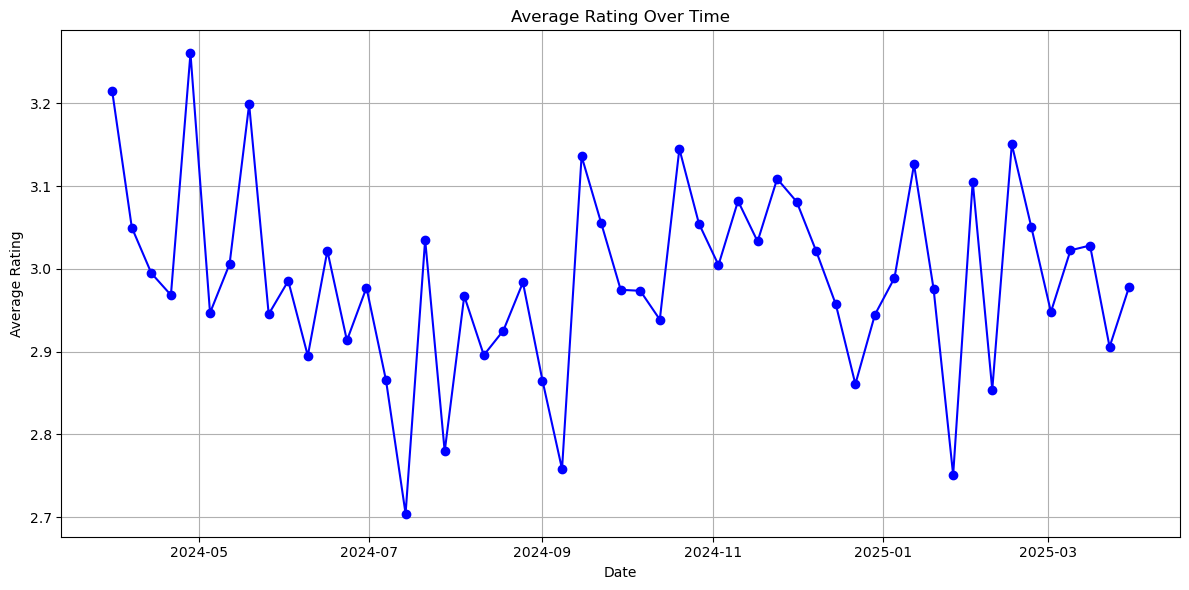

In [33]:
df1=df.set_index('date')
avg_rating_over_time = df1['rating'].resample('W').mean()  # Change 'W' to 'M' for monthly


plt.figure(figsize=(12, 6))
plt.plot(avg_rating_over_time.index, avg_rating_over_time.values, marker='o', color='blue')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5) Ratings as per User Location

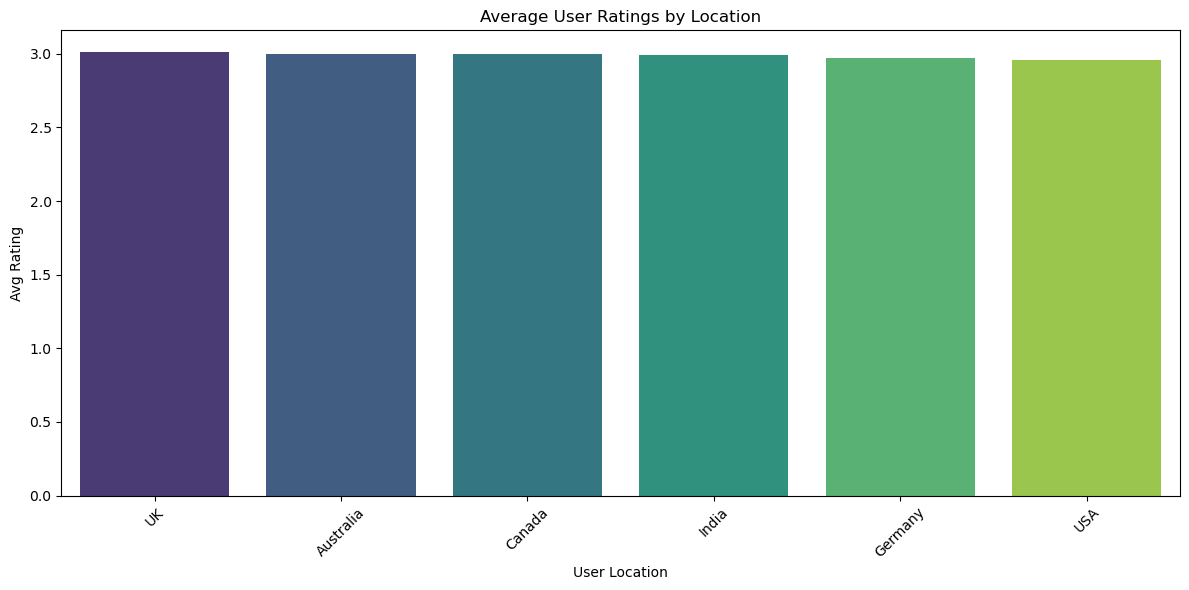

In [34]:
df_grouped = df.groupby('location')['rating'].agg(['mean', 'count']).reset_index()
df_grouped.columns = ['Location', 'Average Rating', 'Number of Ratings']

plt.figure(figsize=(12,6))
sns.barplot(data=df_grouped.sort_values(by='Average Rating', ascending=False),
            x='Location', y='Average Rating', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average User Ratings by Location')
plt.ylabel('Avg Rating')
plt.xlabel('User Location')
plt.tight_layout()
plt.show()


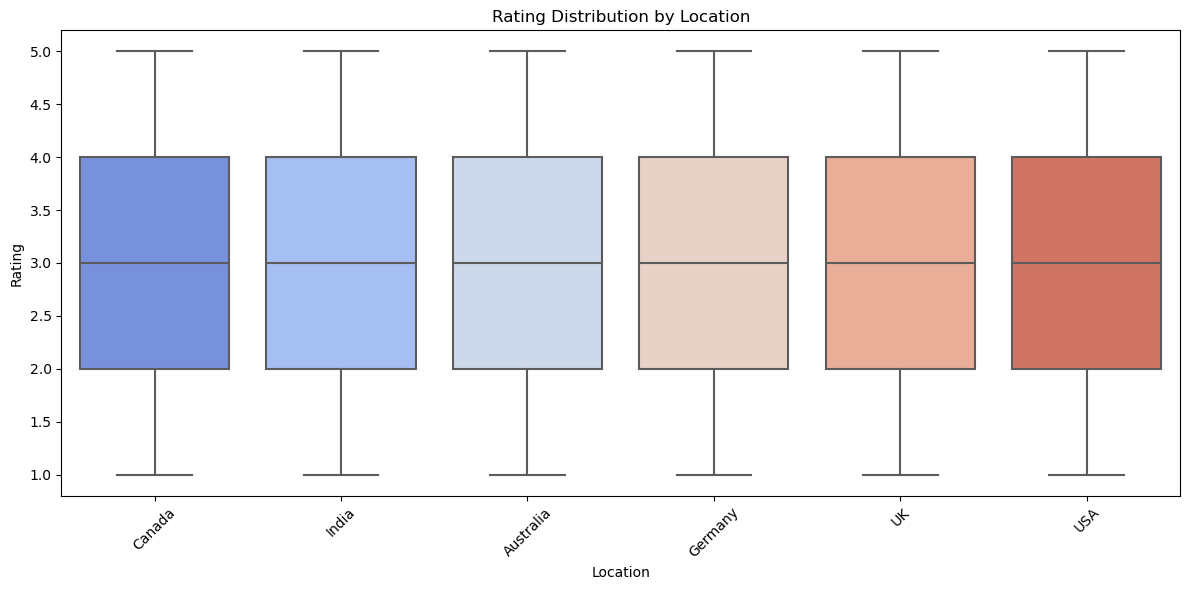

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='location', y='rating', palette='coolwarm')
plt.title('Rating Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

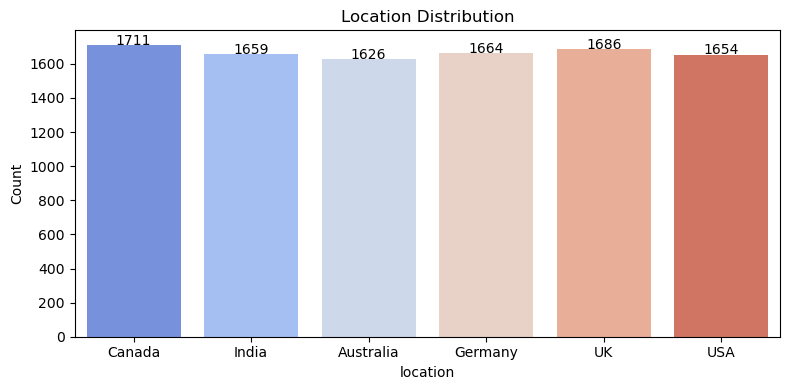

In [72]:
plt.figure(figsize=(8, 4))
ax= sns.countplot(data=df, x='location', palette='coolwarm')
plt.title('Location Distribution')
plt.xlabel('location')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

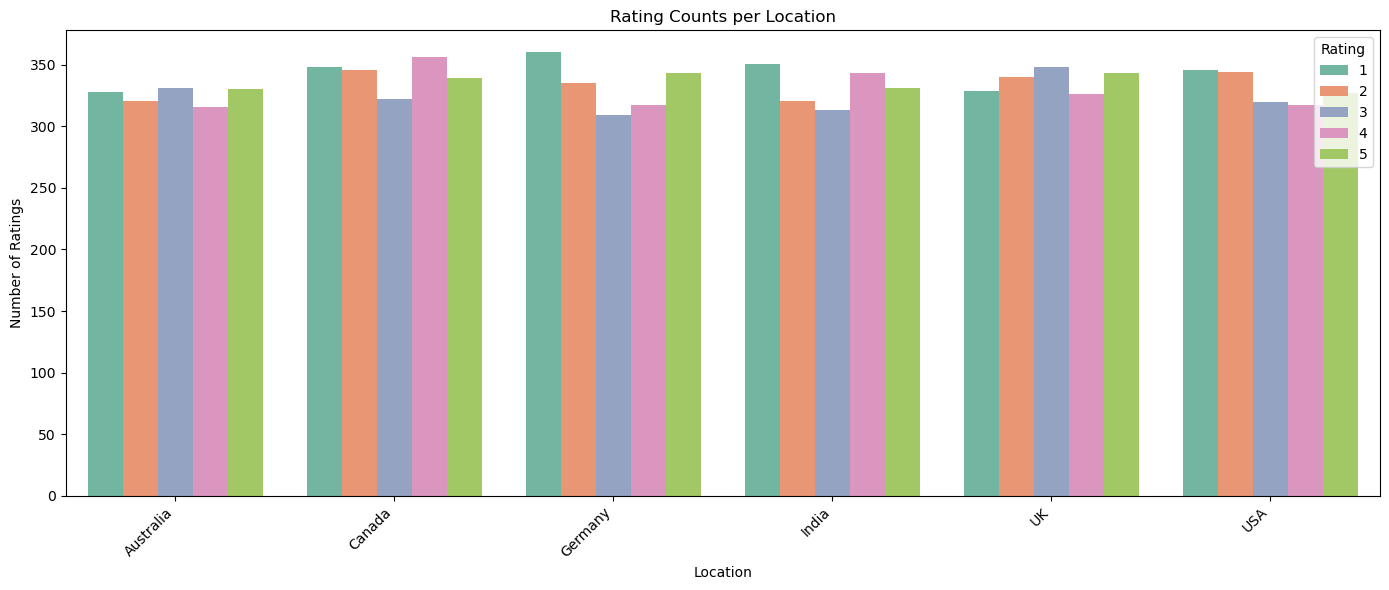

In [76]:
rating_location['rating'] = rating_location['rating'].astype(str)

# Now plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=rating_location, x='location', y='count', hue='rating', palette='Set2')

plt.title('Rating Counts per Location')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

### 6) Rating as per Platform

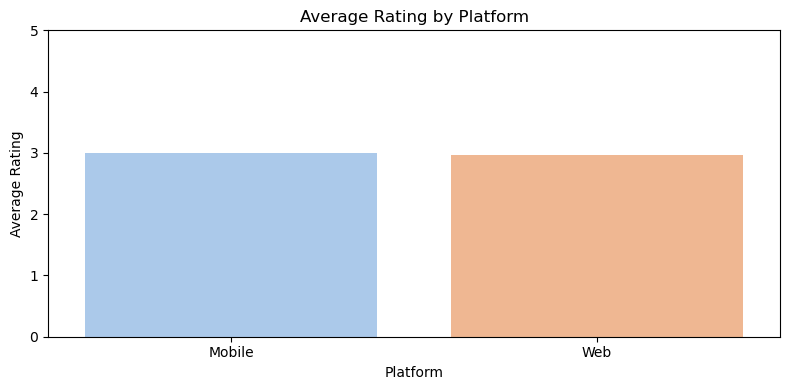

In [43]:
avg_rating = df.groupby('platform')['rating'].mean().reset_index()


plt.figure(figsize=(8, 4))
sns.barplot(data=avg_rating, x='platform', y='rating', palette='pastel')
plt.title('Average Rating by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  
plt.tight_layout()
plt.show()

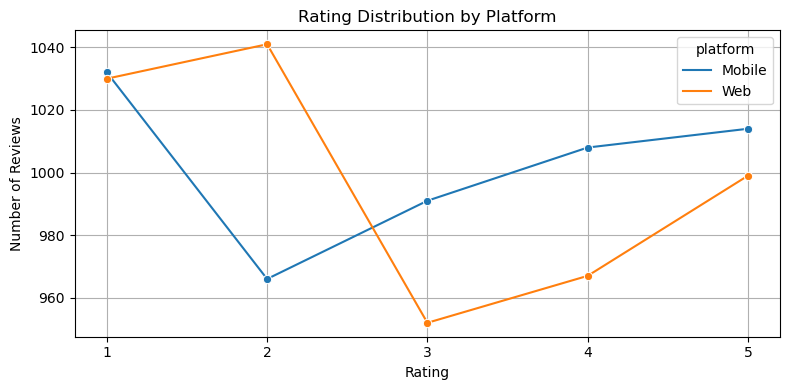

In [62]:
rating_platform = df.groupby(['rating', 'platform']).size().reset_index(name='count')


plt.figure(figsize=(8, 4))
sns.lineplot(data=rating_platform, x='rating', y='count', hue='platform', marker='o')

plt.title('Rating Distribution by Platform')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()
plt.show()

### 7) Verified users vs Non-Verified users

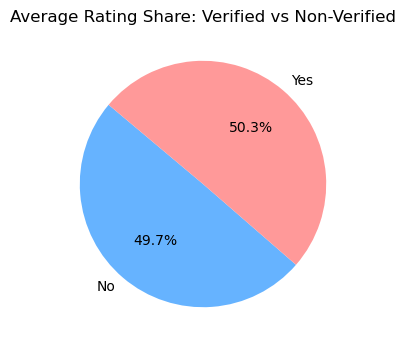

In [56]:
avg_rating_by_verification = df.groupby('verified_purchase')['rating'].mean().reset_index()
avg_rating_by_verification.columns = ['Verified', 'Average Rating']

labels = avg_rating_by_verification['Verified']
sizes = avg_rating_by_verification['Average Rating']

# Plot
plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=140)
plt.title('Average Rating Share: Verified vs Non-Verified')
plt.show()

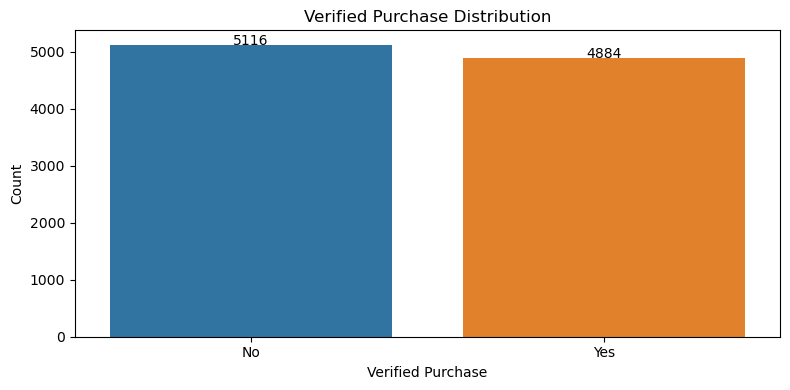

In [55]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='verified_purchase')
plt.title('Verified Purchase Distribution')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

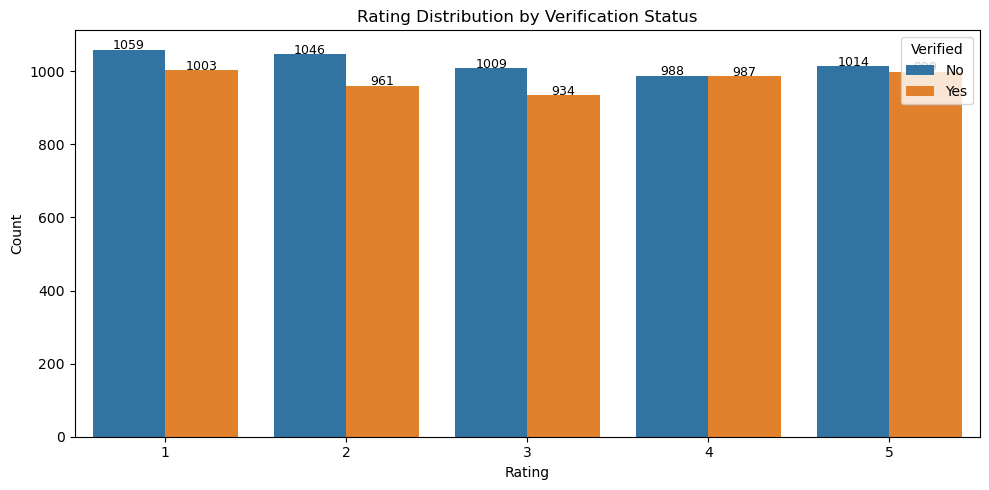

In [63]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', hue='verified_purchase')

plt.title('Rating Distribution by Verification Status')
plt.xlabel('Rating')
plt.ylabel('Count')

# Add value labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=9)

plt.legend(title='Verified')
plt.tight_layout()
plt.show()

### 8) Length of Reviews per Rating Category

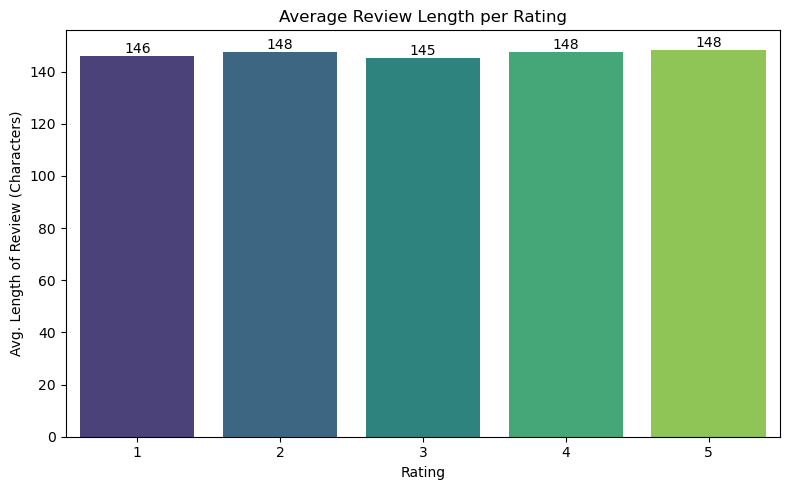

In [64]:
avg_length_by_rating = df.groupby('rating')['review_length'].mean().reset_index()
avg_length_by_rating.columns = ['Rating', 'Average Review Length']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=avg_length_by_rating, x='Rating', y='Average Review Length', palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.0f}', ha="center")

plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Avg. Length of Review (Characters)')
plt.tight_layout()
plt.show()

### 9) Most Mentioned Words in 1-Star Reviews

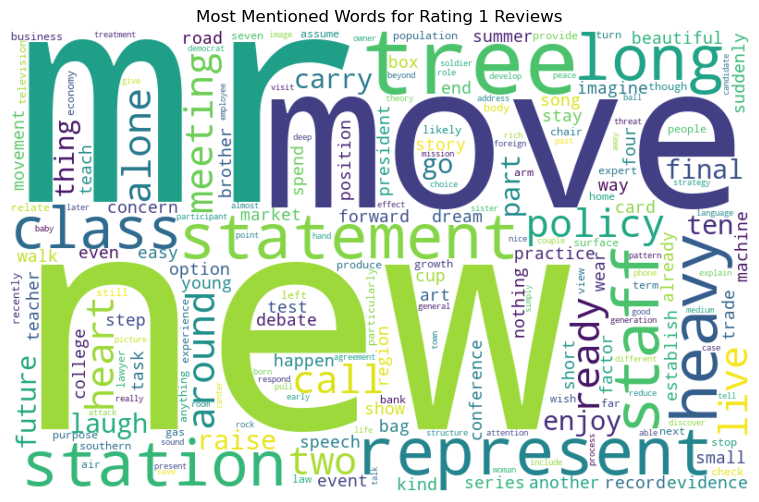

In [14]:
most_mentioned_words = df[df['rating'] == 1]['lemmatized_review'].dropna()

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=500).generate(" ".join(most_mentioned_words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Mentioned Words for Rating 1 Reviews")
plt.show()

### 10) ChatGPT version - Rating Category

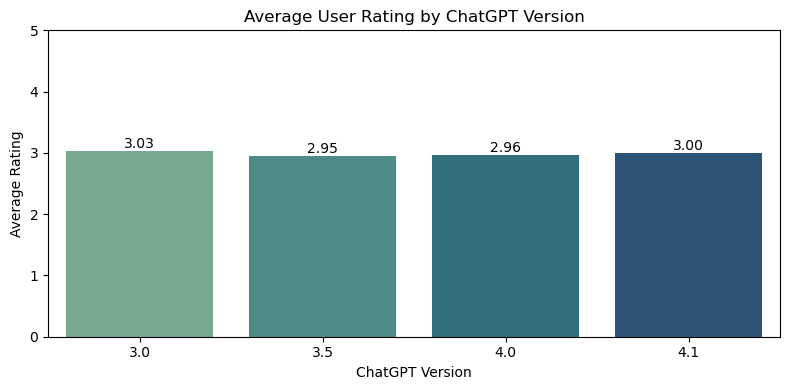

In [78]:
avg_rating = df.groupby('version')['rating'].mean().reset_index()
avg_rating.columns = ['Version', 'Average Rating']
avg_rating = avg_rating.sort_values(by='Average Rating', ascending=False)

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=avg_rating, x='Version', y='Average Rating', palette='crest')

# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.05, f'{height:.2f}', ha='center')

plt.title('Average User Rating by ChatGPT Version')
plt.xlabel('ChatGPT Version')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

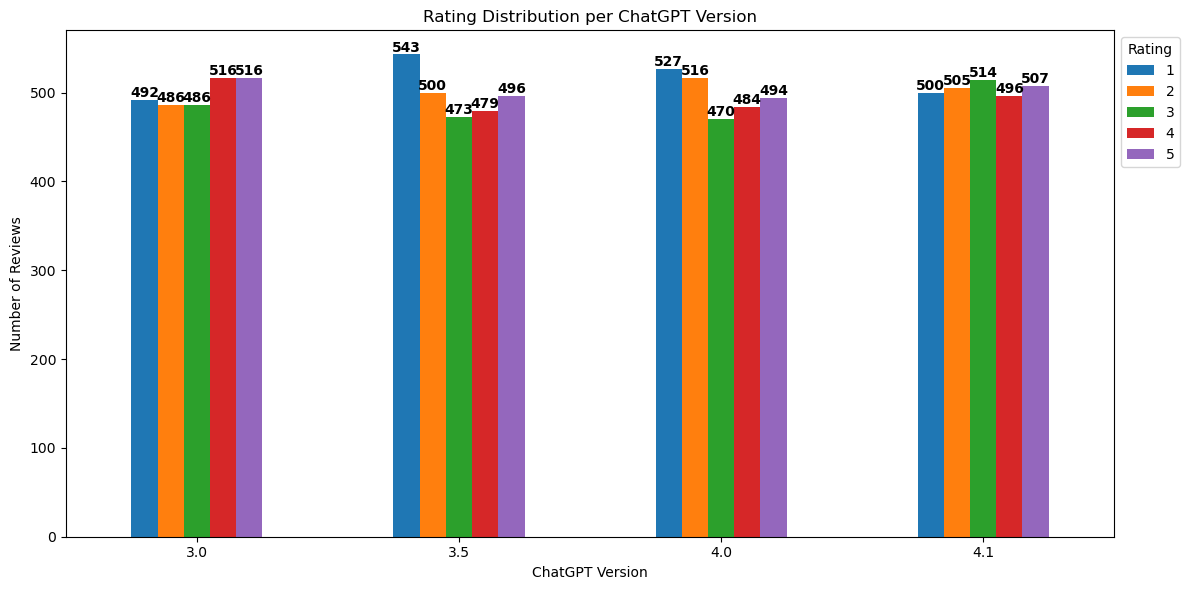

In [85]:
rating_counts = df.groupby(['version', 'rating']).size().unstack(fill_value=0)

# Plotting
ax = rating_counts.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Rating Distribution per ChatGPT Version')
plt.xlabel('ChatGPT Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1, 1), loc='upper left')

# Adding value count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

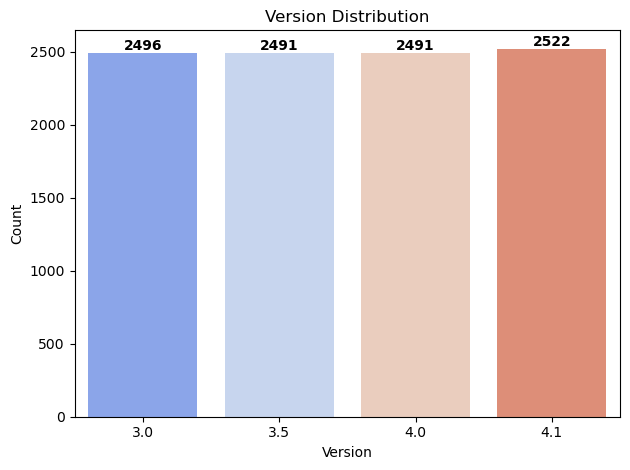

In [86]:
ax = sns.countplot(data=df, x='version', palette='coolwarm')

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

# Set title and labels
plt.title('Version Distribution')
plt.xlabel('Version')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

### Language count

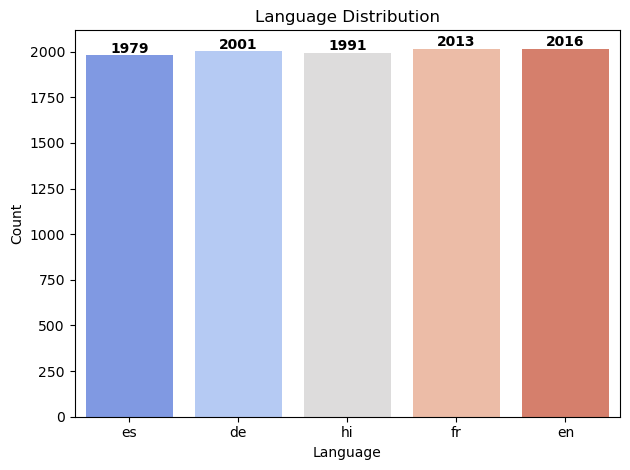

<Figure size 300x300 with 0 Axes>

In [93]:
ax = sns.countplot(data=df, x='language', palette='coolwarm')

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=10, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.figure(figsize=(3, 3))
plt.show()

# es= Spanish [USA]
# de= German [Germany]
# hi= Hindi [India]
# fr= French [Canada]
# en= English [USA, UK, Canada, Australia ]

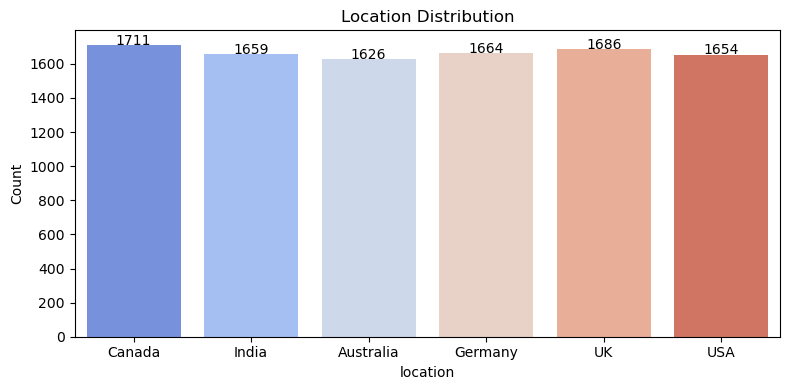

In [88]:
plt.figure(figsize=(8, 4))
ax= sns.countplot(data=df, x='location', palette='coolwarm')
plt.title('Location Distribution')
plt.xlabel('location')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

### Others

#### Sentiment/Rating vs Helpful Votes

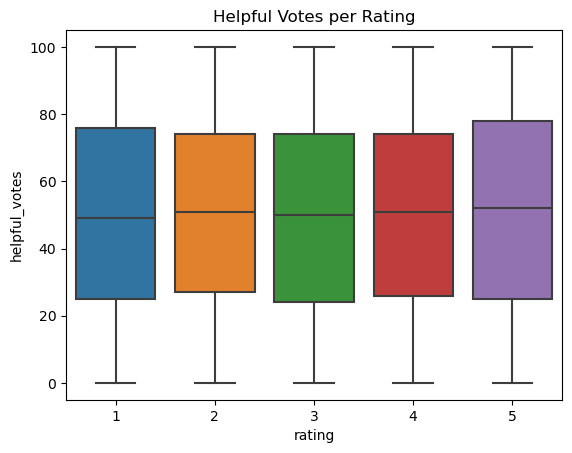

In [20]:
sns.boxplot(x='rating', y='helpful_votes', data=df)
plt.title("Helpful Votes per Rating")
plt.show()

In [95]:
# Function to plot word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud for each sentiment
plot_wordcloud(df[df['sentiment'] == 'Positive']['lemmatized_review'], 'Positive Reviews')


KeyError: 'sentiment'

In [96]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and sentiment
sentiment_trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)

# Plot trend
sentiment_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sentiment Trend for ChatGPT (Friendy)")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


KeyError: 'sentiment'

## Encoding

### Count Vectorizer – Bag of Words (BoW)

In [60]:
# Use the cleaned review column (no punctuation)
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df['lemmatized_review'])

# To view feature names
print(vectorizer.get_feature_names_out())

# Shape of vectorized features
print(X_count.shape)

['ability' 'abilityalso' 'abilitymethod' ... 'yourselfwalk' 'youseries'
 'youwhose']
(10000, 8088)


### TF-IDF Vectorizer – Frequency with importance

In [61]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# To view TF-IDF feature names
print(tfidf_vectorizer.get_feature_names_out())

# Shape of TF-IDF features
print(X_tfidf.shape)

['ability' 'abilityalso' 'abilitymethod' ... 'yourselfwalk' 'youseries'
 'youwhose']
(10000, 8088)


In [62]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf_1 = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# To view TF-IDF feature names
print(tfidf_vectorizer.get_feature_names_out())

# Shape of TF-IDF features
print(X_tfidf_1.shape)

['ability' 'ability across' 'ability activity' ... 'youseries decide'
 'youwhose' 'youwhose rock']
(10000, 172230)


## Train Test Split

In [63]:
# Suppose you're predicting 'sentiment' or another label

X = X_tfidf  
y = df['sentiment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Suppose you're predicting 'sentiment' or another label

X = X_tfidf_1  
y = df['sentiment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Smote

In [65]:
# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({'Positive': 5239, 'Negative': 1898, 'Neutral': 863})
After SMOTE: Counter({'Positive': 5239, 'Negative': 5239, 'Neutral': 5239})


## Models

### LogisticRegression

In [74]:
#Train the model
log = LogisticRegression()
log.fit(X_train, y_train)

# Predictions
y_train_pred = log.predict(X_train)
y_pred_log = log.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Testing Accuracy: {test_accuracy:.4f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(cm)

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_log, digits=4))


Training Accuracy: 0.9998
Testing Accuracy: 0.8400
Confusion Matrix:
[[ 327   11  117]
 [   6   53  150]
 [  32    4 1300]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.8959    0.7187    0.7976       455
     Neutral     0.7794    0.2536    0.3827       209
    Positive     0.8296    0.9731    0.8956      1336

    accuracy                         0.8400      2000
   macro avg     0.8350    0.6484    0.6920      2000
weighted avg     0.8394    0.8400    0.8197      2000



In [73]:
cv_scores = cross_val_score(log, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.9586514  0.96882952 0.97010178 0.96946565 0.98727735 0.98664122
 0.98536896 0.98408657 0.98345003 0.98854233]
Mean CV Accuracy: 0.9782414808480038


### Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print(f"Decision Tree - Training Accuracy: {accuracy_score(y_train_res, dt_model.predict(X_train_res)):.4f}")
print(f"Decision Tree - Testing Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=4))

### Random Forest

In [ ]:
# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
print(f"Random Forest - Training Accuracy: {accuracy_score(y_train, rf_model.predict(X_train)):.4f}")
print(f"Random Forest - Testing Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

### Naive Bayes Classifier

In [ ]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Accuracy
print(f"Naive Bayes - Training Accuracy: {accuracy_score(y_train_res, nb_model.predict(X_train_res)):.4f}")
print(f"Naive Bayes - Testing Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")

# Classification Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, digits=4))

### XGBoost (Extreme Gradient Boosting)

In [ ]:
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
print(f"XGBoost - Training Accuracy: {accuracy_score(y_train_res, xgb_model.predict(X_train_res)):.4f}")
print(f"XGBoost - Testing Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))

### SVC

In [ ]:
# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy
print(f"SVM - Training Accuracy: {accuracy_score(y_train_res, svm_model.predict(X_train_res)):.4f}")
print(f"SVM - Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=4))

## Manual Testing

## Save the model

## Open and use it